# P3 Run Trained Model

Don't forget that you shouild be running in the `drlnd` conda environment and you should have chosen your ipyrthon kernel to be `drlnd` as well

In [1]:
from collections import deque
from unityagents import UnityEnvironment

## Open environment and view the space

In [2]:

env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## Run without training

In [3]:
import torch
import numpy as np

def run(n_episodes=20):
    scores_moving_win = deque(maxlen=100)
    total_scores = []
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(num_agents) # One score per agent
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        agent.reset()
        t = 0
        while True:
            with torch.no_grad():
                actions = agent.act(states)
            env_info = env.step(actions)[brain_name]      
            next_states = env_info.vector_observations            
            rewards = env_info.rewards
            scores += rewards
            dones = env_info.local_done 
            states = next_states
            if np.all(dones):
                break
            t += 1
        scores = np.max(scores)
        mean_score = np.mean(scores)
        scores_moving_win.append(mean_score)
        total_scores.append(mean_score)
        average_score_moving_win = np.mean(scores_moving_win)
        
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, average_score_moving_win))
    return total_scores

In [4]:
# Instantiate just the actor 
from agent import Agent

agent = Agent(state_size=state_size, action_size=action_size)
agent.actor_local.load_state_dict(torch.load('final_actor.pth'))
agent.actor_local.eval()

# run
scores = run()

cuda:0
Episode 1	Score: 0.19
Episode 2	Score: 0.79
Episode 3	Score: 0.56
Episode 4	Score: 0.82
Episode 5	Score: 0.67
Episode 6	Score: 0.70
Episode 7	Score: 0.69
Episode 8	Score: 0.61
Episode 9	Score: 0.55
Episode 10	Score: 0.75
Episode 11	Score: 0.73
Episode 12	Score: 0.79
Episode 13	Score: 0.84
Episode 14	Score: 0.83
Episode 15	Score: 0.81
Episode 16	Score: 0.77
Episode 17	Score: 0.74
Episode 18	Score: 0.71
Episode 19	Score: 0.77
Episode 20	Score: 0.77


## Run with model trained in 1076 episodes to solve task and plot run results

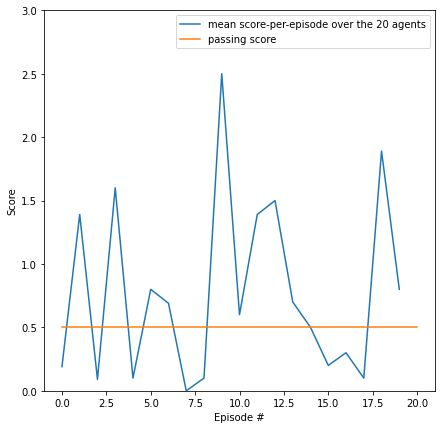

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_results (scores):
    # plot the scores
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.plot([0,len(scores)],[0.5, 0.5])
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(['mean score-per-episode over the 20 agents',
                'passing score'])
    plt.ylim(bottom=0, top=3)
    plt.show()
plot_results(scores)

In [9]:
env.close()